In [1]:
from simulate_scattering import *
import matplotlib.pyplot as plt
import time

In [2]:
#structure_file = '../../structure_noise_sim/simulation/xyz_mm_test/icsd_005248_cc_r4_lc_2.67_0_cubic.xyz'
#structure_file = 'example_data/sim_Ag2O_cc_r4_lc_2.64_4_AntiFlourite.xyz'
structure_file = 'example_data/icsd_001504_cc_r6_lc_2.85_6_tetragonal.xyz'
#structure_file = '../../../../nanostructure_repos/CrystalSimulation/xyz_icsd/icsd_002114_cc_r8_lc_3.22_6_cubic.xyz'

SS = ScatteringSimulator(device='cuda', batch_size=200, radiation_type='x')
SS.set_parameters(qmin=2, qmax=30, rmin=0, rmax=15, rstep=0.01, biso=0.3, delta2=0, qbroad=0.00, qstep=0.01, qdamp=0.0, verbose=2)

diffpy_time = time.time()

diffpy_structure = loadStructure(structure_file)
dbc = DebyePDFCalculator(rmin=SS.rmin, rmax=SS.rmax, rstep=SS.rstep,
                         qmin=SS.qmin, qmax=SS.qmax, qdamp=SS.qdamp, delta2=SS.delta2)
diffpy_structure.B11 = SS.biso
diffpy_structure.B22 = SS.biso
diffpy_structure.B33 = SS.biso
diffpy_structure.B12 = 0
diffpy_structure.B13 = 0
diffpy_structure.B23 = 0
r0, g0 = dbc(diffpy_structure)
diffpy_time = time.time() - diffpy_time
diffpy_time *= 1000

##########
Structure Name:  icsd_001504_cc_r6_lc_2.85_6_tetragonal.xyz
Structure Size:  137
Unique species:  ['O' 'V']
Number of Distance Pairs:  9316
##########
##########
Structure Name:  icsd_001504_cc_r6_lc_2.85_6_tetragonal.xyz
Structure Size:  137
Unique species:  ['O' 'V']
Number of Distance Pairs:  9316
##########


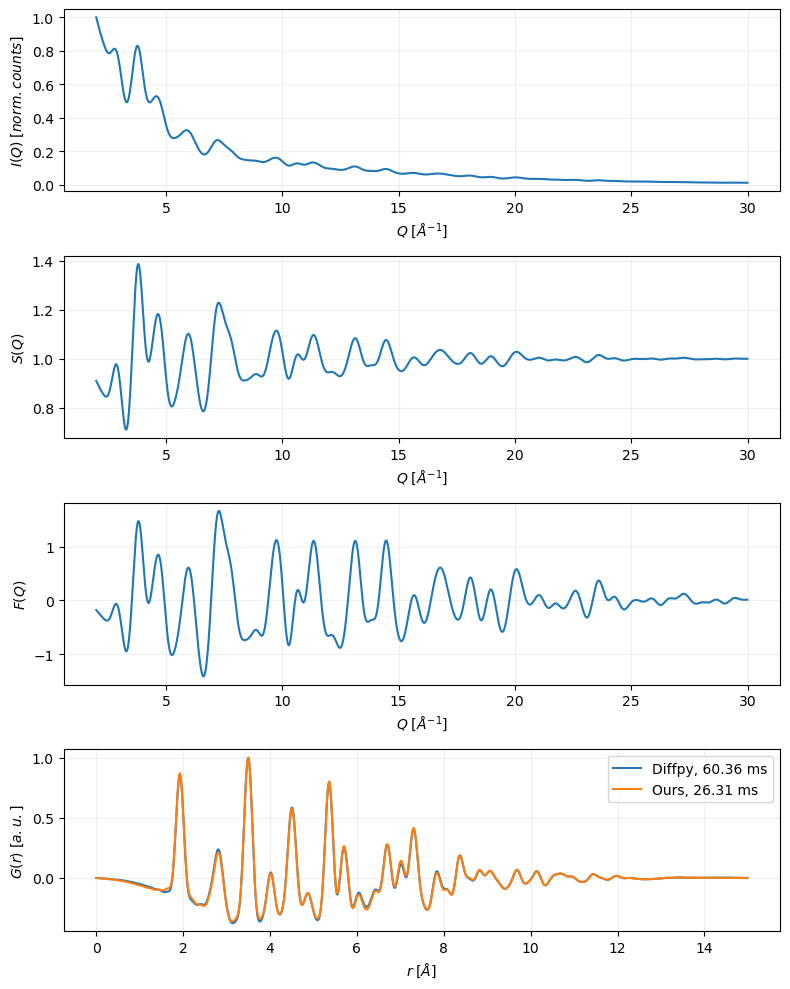

In [3]:
q, iq = SS.iq(structure_file)
ours_time = time.time()
r, gr = SS.gr(structure_file)
ours_time = time.time() - ours_time
ours_time *= 1000
sq = SS.sq.cpu().numpy() + 1
fq = SS.fq.cpu().numpy()

fig, (ax_iq, ax_sq, ax_fq, ax_gr) = plt.subplots(4,1, figsize=(8,10))

ax_iq.plot(q,iq/max(iq))
ax_iq.set(xlabel='$Q \; [\AA^{-1}]$', ylabel='$I(Q) \; [norm. counts]$')
ax_iq.grid(alpha=0.2)

ax_sq.plot(q,sq)
ax_sq.set(xlabel='$Q \; [\AA^{-1}]$', ylabel='$S(Q)$')
ax_sq.grid(alpha=0.2)

ax_fq.plot(q, fq)
ax_fq.set(xlabel='$Q \; [\AA^{-1}]$', ylabel='$F(Q)$')
ax_fq.grid(alpha=0.2)

ax_gr.plot(r0, g0/max(g0), label=f'Diffpy, {diffpy_time:1.2f} ms')
ax_gr.plot(r,gr/max(gr), label=f'Ours, {ours_time:1.2f} ms')
ax_gr.grid(alpha=0.2)
ax_gr.set(xlabel='$r \; [\AA]$', ylabel='$G(r) \; [a.u.]$')
ax_gr.legend()
fig.tight_layout()
plt.show()

In [17]:
# Create structures
SS = ScatteringSimulator()
# radii = np.linspace(2,12,12)
radii = np.arange(2,32,1)
nanops, nanop_sizes = SS.generate_nanoparticle(structure_path='example_data/AntiFlourite_Co2O.cif', radii=radii)


Generating NPs:  93%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋            | 28/30 [01:27<00:07,  3.56s/it]

OutOfMemoryError: CUDA out of memory. Tried to allocate 1.45 GiB (GPU 0; 6.00 GiB total capacity; 3.10 GiB already allocated; 208.00 MiB free; 4.06 GiB reserved in total by PyTorch) If reserved memory is >> allocated memory try setting max_split_size_mb to avoid fragmentation.  See documentation for Memory Management and PYTORCH_CUDA_ALLOC_CONF

In [18]:
print(SS.timings.summary())


   -> Centering: 9561.993ms +- 0.000ms (9.88%) 
   -> Generate NP, 29: 3700.167ms +- 0.000ms (3.82%) 
   -> Generate NP, 28: 3658.314ms +- 0.000ms (3.78%) 
   -> Generate NP, 27: 3622.254ms +- 0.000ms (3.74%) 
   -> Generate NP, 26: 3602.588ms +- 0.000ms (3.72%) 
   -> Generate NP, 24: 3347.648ms +- 0.000ms (3.46%) 
   -> Generate NP, 25: 3274.544ms +- 0.000ms (3.38%) 
   -> Generate NP, 19: 3231.755ms +- 0.000ms (3.34%) 
   -> Generate NP, 23: 3211.693ms +- 0.000ms (3.32%) 
   -> Generate NP, 22: 3196.199ms +- 0.000ms (3.30%) 
   -> Generate NP, 20: 3185.352ms +- 0.000ms (3.29%) 
   -> Generate NP, 18: 3175.438ms +- 0.000ms (3.28%) 
   -> Generate NP, 13: 3167.379ms +- 0.000ms (3.27%) 
   -> Generate NP, 17: 3135.347ms +- 0.000ms (3.24%) 
   -> Generate NP, 21: 3132.022ms +- 0.000ms (3.24%) 
   -> Generate NP, 16: 3038.804ms +- 0.000ms (3.14%) 
   -> Generate NP, 8: 3035.981ms +- 0.000ms (3.14%) 
   -> Generate NP, 15: 2993.040ms +- 0.000ms (3.09%) 
   -> Generate NP, 12: 2985.265ms 

In [12]:
total_means, gr_means, iq_means = [], [], []
total_stds, gr_stds, iq_stds = [], [], []
n_atoms = []
for i in trange(len(radii)):
    total = []
    gr = []
    iq = []
    for j in range(10):
        SS = ScatteringSimulator(batch_size=4000)
        SS.gr(nanops[i])
        total.append(SS.timings.total())
        gr.append(SS.timings.means()['G(r)'])
        iq.append(SS.timings.means()['I(Q)'])
    
    n_atoms.append(SS.struc_size)
    
    total_means.append(np.mean(total))
    total_stds.append(np.std(total))
    
    gr_means.append(np.mean(gr))
    gr_stds.append(np.std(gr))
    
    iq_means.append(np.mean(iq))
    iq_stds.append(np.std(iq))
    
total_means = np.array(total_means)*1000
total_stds = np.array(total_stds)*1000

gr_means = np.array(gr_means)*1000
gr_stds = np.array(gr_stds)*1000

iq_means = np.array(iq_means)*1000
iq_stds = np.array(iq_stds)*1000


 83%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                  | 19/23 [00:51<00:34,  8.56s/it]

                                                                                                                                                                                                                                             
100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 23/23 [02:57<00:00,  7.71s/it]


In [20]:
for i,n in enumerate(nanops):
    write(f'struc_{radii[i]}.xyz', n, 'xyz')

In [21]:
from glob import glob

In [24]:
diffpy_means = []
diffpy_stds = []

for f in sorted(glob('struc_*.xyz')):
    inner = []
    
    for j in trange(10):

        diffpy_time = time.time()

        diffpy_structure = loadStructure(f)
        dbc = DebyePDFCalculator(rmin=SS.rmin, rmax=SS.rmax, rstep=SS.rstep,
                                 qmin=SS.qmin, qmax=SS.qmax, qdamp=SS.qdamp, delta2=SS.delta2)
        diffpy_structure.B11 = SS.biso
        diffpy_structure.B22 = SS.biso
        diffpy_structure.B33 = SS.biso
        diffpy_structure.B12 = 0
        diffpy_structure.B13 = 0
        diffpy_structure.B23 = 0
        r0, g0 = dbc(diffpy_structure)
        diffpy_time = time.time() - diffpy_time
        diffpy_time *= 1000
        inner.append(diffpy_time)
    
    diffpy_means.append(np.mean(inner))
    diffpy_stds.append(np.std(inner))

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 10/10 [00:02<00:00,  4.27it/s]


In [26]:
nanop_sizes = np.array([nps.cpu() for nps in nanop_sizes])

In [35]:
diffpy_stds = np.array(diffpy_stds)
diffpy_means = np.array(diffpy_means)

In [40]:
len(n_atoms)

23

In [41]:
len(diffpy_stds)

28

In [48]:
nanop_sizes[:len(diffpy_means)].shape

(28,)

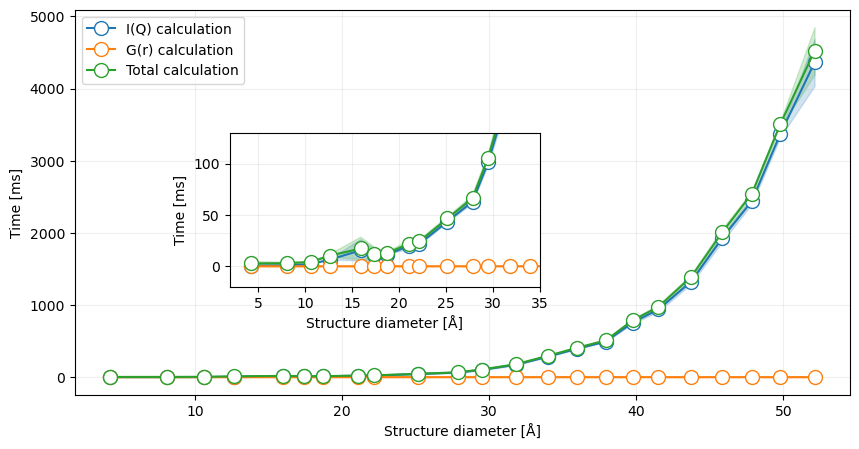

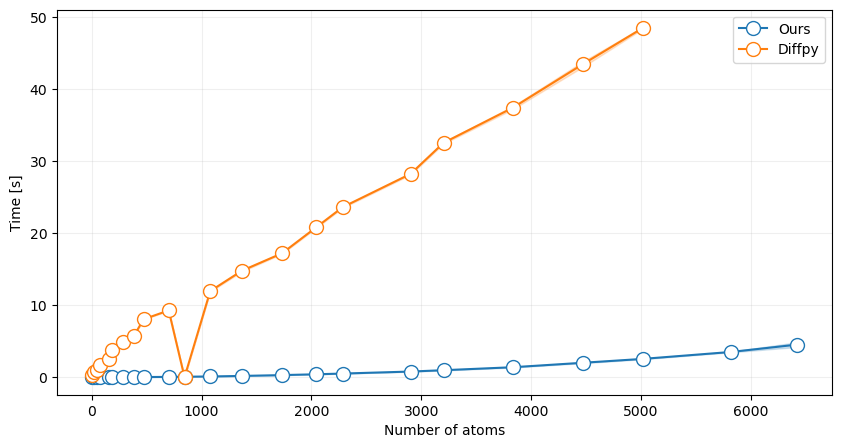

In [58]:
fig, ax1 = plt.subplots(figsize=(10,5))

axins = ax1.inset_axes([0.2, 0.28, 0.4, 0.4])

for ax in [ax1, axins]:

    p = ax.plot(nanop_sizes[:len(iq_means)], iq_means, marker='o', markerfacecolor='w', markersize=10, label='I(Q) calculation')
    ax.fill_between(nanop_sizes[:len(iq_means)], iq_means-iq_stds, iq_means+iq_stds, alpha=0.2, color=p[0].get_color())

    p = ax.plot(nanop_sizes[:len(iq_means)], gr_means, marker='o', markerfacecolor='w', markersize=10, label='G(r) calculation')
    ax.fill_between(nanop_sizes[:len(iq_means)], gr_means-gr_stds, gr_means+gr_stds, alpha=0.2, color=p[0].get_color())

    p = ax.plot(nanop_sizes[:len(iq_means)], total_means, marker='o', markerfacecolor='w', markersize=10, label='Total calculation')
    ax.fill_between(nanop_sizes[:len(iq_means)], total_means-total_stds, total_means+total_stds, alpha=0.2, color=p[0].get_color())
    
    ax.set(xlabel='Structure diameter [Å]', ylabel='Time [ms]')
    
axins.set(xlim=(2,35), ylim=(-20,130))
ax1.grid(alpha=0.2)
axins.grid(alpha=0.2)
ax1.legend()

plt.show()

fig, ax2 = plt.subplots(figsize=(10,5))
#ax2 = ax1.twiny()

# Ours
#p = ax1.plot(nanop_sizes[:len(iq_means)], total_means, marker='o', markerfacecolor='w', markersize=10, label='Diameter')
#ax1.fill_between(nanop_sizes[:len(iq_means)], total_means-total_stds, total_means+total_stds, alpha=0.2, color=p[0].get_color())

p = ax2.plot(n_atoms, total_means/1000, marker='o', markerfacecolor='w', markersize=10, label='Ours')
ax2.fill_between(n_atoms, total_means/1000-total_stds/1000, total_means/1000+total_stds/1000, alpha=0.2, color=p[0].get_color())

# Diffpy
ul = 21
#p = ax1.plot(nanop_sizes[:ul], diffpy_means[:ul], marker='o', markerfacecolor='w', markersize=10, label='Diameter', c='#ff7f0e')
#ax1.fill_between(nanop_sizes[:ul], diffpy_means[:ul]-diffpy_stds[:ul], diffpy_means[:ul]+diffpy_stds[:ul], alpha=0.2, color=p[0].get_color())

p = ax2.plot(n_atoms[:ul], diffpy_means[:ul]/1000, marker='o', markerfacecolor='w', markersize=10,c='#ff7f0e', label='Diffpy')
ax2.fill_between(n_atoms[:ul], diffpy_means[:ul]/1000-diffpy_stds[:ul]/1000, diffpy_means[:ul]/1000+diffpy_stds[:ul]/1000, alpha=0.2, color=p[0].get_color())

ax2.set_ylabel('Time [s]')
#ax1.set_xlabel('Structure diameter [Å] (-)')
ax2.set_xlabel('Number of atoms')
    
ax2.grid(alpha=0.2)
ax2.legend()

plt.show()